In [42]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/DataMining/Lab-conclusion/lab10/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#Task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

#for task 11 confusion_matrix plot
import itertools

import warnings
warnings.filterwarnings('ignore')

In [44]:
#Task 2: Import dataset
diabetes = pd.read_csv(path+'Diabetes_Data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [45]:
# More on Task 2: Check the dimension of your dataset
print("Cancer data set dimensions : {}".format(diabetes.shape))
# Our dataset has 768 observations/instances/rows and 9 attributes/columns
#Check for missing or Null Data points
diabetes.isnull().sum()
diabetes.isna().sum()
# There is no missing values in dataset

Cancer data set dimensions : (768, 9)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
# Task 3: Set the input (X) and output/target (y)
#Assign Variables Use the first 8 columns as input/predictors and the last column (Outcome) as output/target.
X = diabetes.iloc[:, 1:8].values
y = diabetes.iloc[:, 8].values

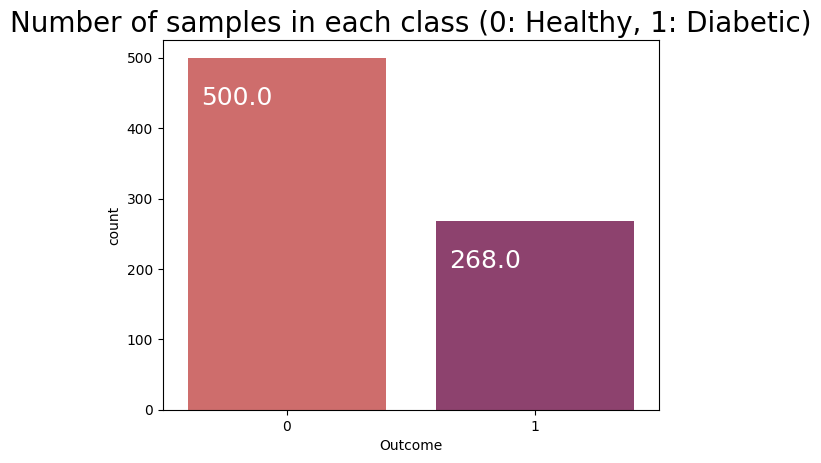

In [47]:
#Explore the Data Perform initial data exploration through Tasks 4.1 and 4.2.
#Task 4.1: Check the class distribution by plotting the count of outcomes by their value. Explain
#your findings.
#Task 4.2: Create a Pearson's heatmap to explore the correlation between the inputs/predictors and
#the class. Explain your findings.

# Task 4.1: counting values of variables in 'Outcome'
ax = sns.countplot(x="Outcome", data=diabetes, palette="flare")
ax.set_title('Number of samples in each class (0: Healthy, 1: Diabetic)', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

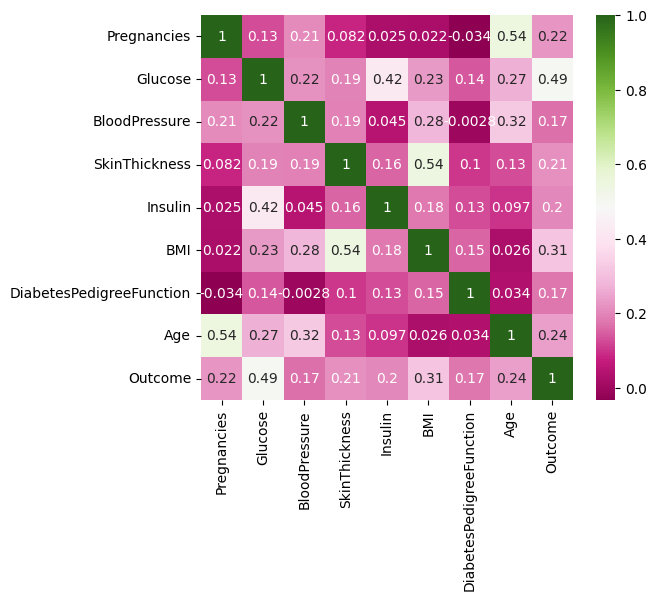

In [48]:
#Task 4.2
plt.figure(figsize=(6,5))  # Set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='PiYG')

In [49]:
#Rescaling the Data Looking at your input data, you will notice that the data in each column have
#different ranges. It is recommended to bring all the features to the same scale through rescaling.
#Task 5: Rescale your dataset using sklearn's standardscaler

#Task 5 Sacle input data
# Show summary statistics
print(diabetes.describe())
#looking and the min and max we can see that the range
#of values are very diffrent (e.g., DiabetesPedigreeFunction compared with Glucose level)
sc = StandardScaler()
X = sc.fit_transform(X)

#To make sure we accomodate the problem of large diffrence between our features' range

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.108073  140.671875   
std       3.369578   30.435949      12.096346       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

In [50]:
#Task 6: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=3)

#print("X_train set dimensions : {}".format(X_train.shape))
#print("X_test set dimensions : {}".format(X_test.shape))
#print("y_train set dimensions : {}".format(y_train.shape))
#print("y_test set dimensions : {}".format(y_test.shape))

In [51]:
#Develop a Multilayer Perceptron (MLP) model for the dataset using SciKit Learn
#MLPClassifier. Build the model with 200 iterations (chosen arbitrarily) with the solver for weight
#optimization set to the ‘adam’ version of stochastic gradient descent (it will automatically adapt the learning rate).
#• Activation function = 'logistic'
#• solver for weight optimization = 'adam'
#• learning rate = 0.01

# Task 7.1 and 7.2: Build the Model and fit to train set
mlp = MLPClassifier(
    max_iter=200,
    alpha=0.01,
    activation='logistic',
    solver='adam')

#Fit the model
mlp.fit(X_train, y_train)
#Make prediction
mlp_predict = mlp.predict(X_test)

Number of iterations:  156


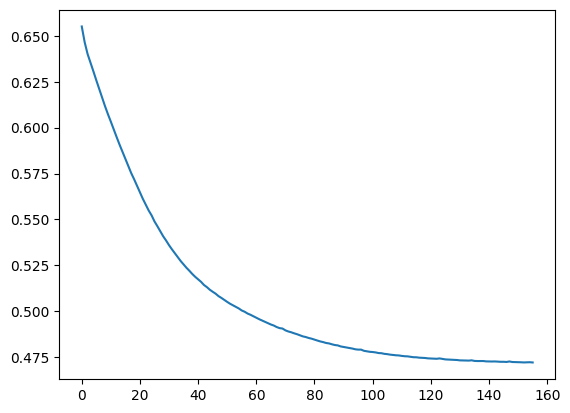

In [52]:
#Adjust the configuration before evaluating models. It is a good idea to review the learning
#dynamics and tune the model architecture and configuration until we have stable learning dynamics,
#then look at getting the most out of the model. Obtain the ‘loss_values’ and plot it. Explain your
#findings and adjust the ‘max_iter’ parameter value accordingly.

# Task 7.3: Adjust the Configuration

# ???? Study the Multi-layer Perceptron classifier's attributes and find out the number of iterations the solver has run.
print("Number of iterations: ", mlp.n_iter_)
#Q: Why did the iterations stopped before 200?
#Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.show()

In [53]:
#Evaluate Model Performance
#Task 8: At the end of the training, evaluate the model’s performance on the test dataset and provide
#the model Accuracy, classification report, and score on the training and test sets.

#Task 8
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(X_train, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(X_test, y_test) * 100))

MLP Accuracy: 76.19%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.78      0.89      0.83       150
           1       0.72      0.53      0.61        81

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

MLP Training set score: 78.21%
MLP Testing set score: 76.19%


In [59]:
sorted(diabetes.Outcome.unique())

[0, 1]

<Axes: >

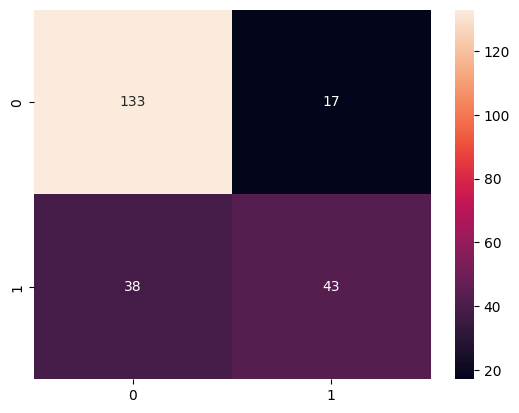

In [56]:
#9: Now check the confusion matrix and the score of the predicted values. Visualize the
#confusion matrix of the predicting values and explain your findings.

# Task 9: Confusion Matrix for MLPClassifier using train test split
outcome_labels = sorted(diabetes.Outcome.unique())
sns.heatmap(
    confusion_matrix(y_test, mlp_predict),
    annot=True,
    fmt="d",#fmt=".1f",
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

In [65]:
#Now that we have some idea of the
#learning dynamics for a simple MLP model on the dataset, we can look at developing a more
#robust evaluation of model performance on the dataset. The k-fold cross-validation procedure
#can provide a more reliable estimate of MLP performance, although it can be very slow as ‘k’
#models must be fitted and evaluated. This is however not a problem for a small dataset, such as the
#cancer survival dataset.



# Task 10: prepare kfold cross validation
kfold = StratifiedKFold(10, shuffle=True)
# enumerate splits
scores = list()
predicted_targets = np.array([])
actual_targets = np.array([])
mlp_predict_proba= np.array([])
mlp_predict = np.array([])
X_test=np.array([])
for train_ix, test_ix in kfold.split(X, y):
    # split data
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    # fit the model
    mlp.fit(X_train, y_train)
    # predict test set
    mlp_predict = mlp.predict(X_test)
    predicted_targets = np.append(predicted_targets, mlp_predict)
    actual_targets = np.append(actual_targets, y_test)
    print('----------------------')
    '''
     # evaluate on train
    score_train = mlp.score(X_train, y_train)
    print('score_train:%.2f' % score_train)
    scores.append(score_train)
    '''


    # evaluate on predictions
    score_test = accuracy_score(y_test, mlp_predict)
    print('score_test: %.2f' % score_test)
    scores.append(score_test)

# summarize all score_test
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(actual_targets, predicted_targets) * 100))

----------------------
score_test: 0.77
----------------------
score_test: 0.74
----------------------
score_test: 0.74
----------------------
score_test: 0.79
----------------------
score_test: 0.77
----------------------
score_test: 0.73
----------------------
score_test: 0.90
----------------------
score_test: 0.79
----------------------
score_test: 0.71
----------------------
score_test: 0.80
MLP Accuracy: 77.34%


In [61]:
## Task 11: Function to generate Kfold's confusion_matrix
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

In [64]:
# Task 11: Function to plot Kfold's confusion_matrix
def plot_myconfusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix from K-fold result')
    plt.show()

[[435  65]
 [109 159]]


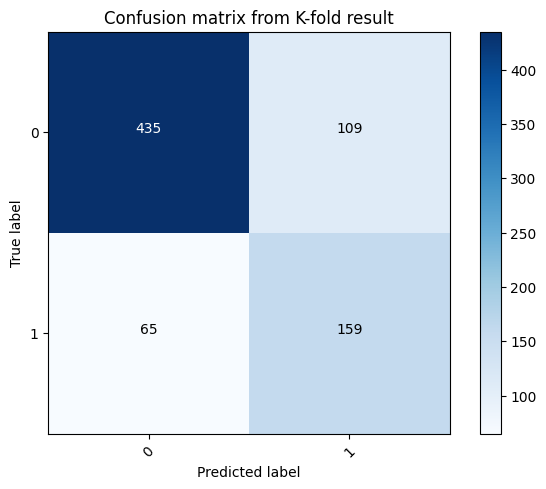

None


In [66]:
#Q1
class_names=[0, 1]

print(confusion_matrix(actual_targets,predicted_targets))
print(plot_myconfusion_matrix(actual_targets,predicted_targets))


#Call function(s) above (Task 8) to generate and plot the confusion matrix